In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [120]:
pd.set_option('display.max_columns', None)

In [121]:
sns.set_style('whitegrid')

In [122]:
df = pd.read_csv('german_credit_data.csv')

In [123]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [124]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [125]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [126]:
df.shape

(1000, 11)

In [127]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        1000 non-null   int64
 1   Age               1000 non-null   int64
 2   Sex               1000 non-null   str  
 3   Job               1000 non-null   int64
 4   Housing           1000 non-null   str  
 5   Saving accounts   817 non-null    str  
 6   Checking account  606 non-null    str  
 7   Credit amount     1000 non-null   int64
 8   Duration          1000 non-null   int64
 9   Purpose           1000 non-null   str  
 10  Risk              1000 non-null   str  
dtypes: int64(5), str(6)
memory usage: 86.1 KB


In [128]:
df.describe(include="all")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [129]:
df["Job"].unique()

array([2, 1, 3, 0])

In [130]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [131]:
df = df.drop_duplicates().reset_index(drop=True)

In [132]:
df.duplicated().sum()

np.int64(0)

In [133]:
df.dropna().reset_index(drop=True)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [134]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='str')

In [135]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [136]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='str')

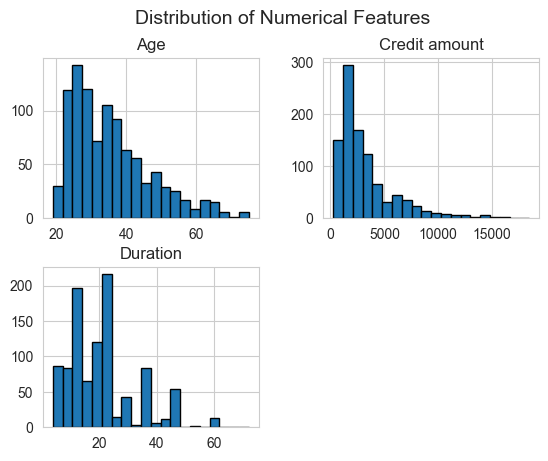

In [137]:
df[["Age", "Credit amount", "Duration"]].hist(bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

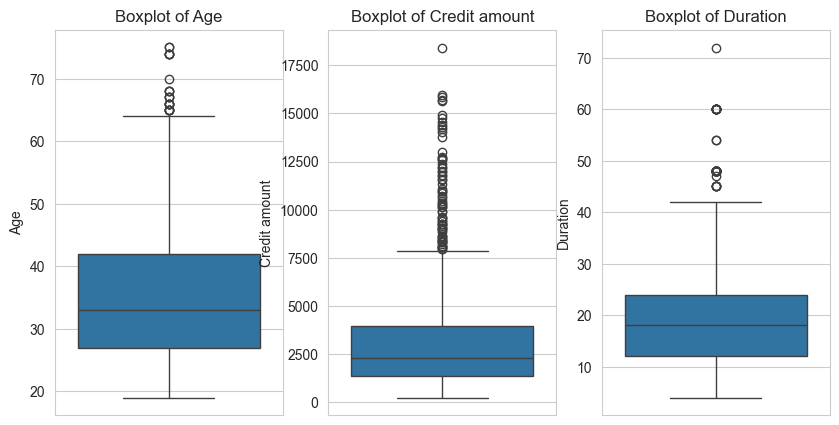

In [138]:
plt.figure(figsize=( 10, 5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

In [139]:
df.query("`Credit amount` >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [140]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

C:\Users\Prathmesh Bunde\AppData\Local\Temp\ipykernel_16776\128080152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Prathmesh Bunde\AppData\Local\Temp\ipykernel_16776\128080152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Prathmesh Bunde\AppData\Local\Temp\ipykernel_16776\128080152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Prathmesh Bunde\AppData\Local\Temp\ipykernel_16776\128080152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

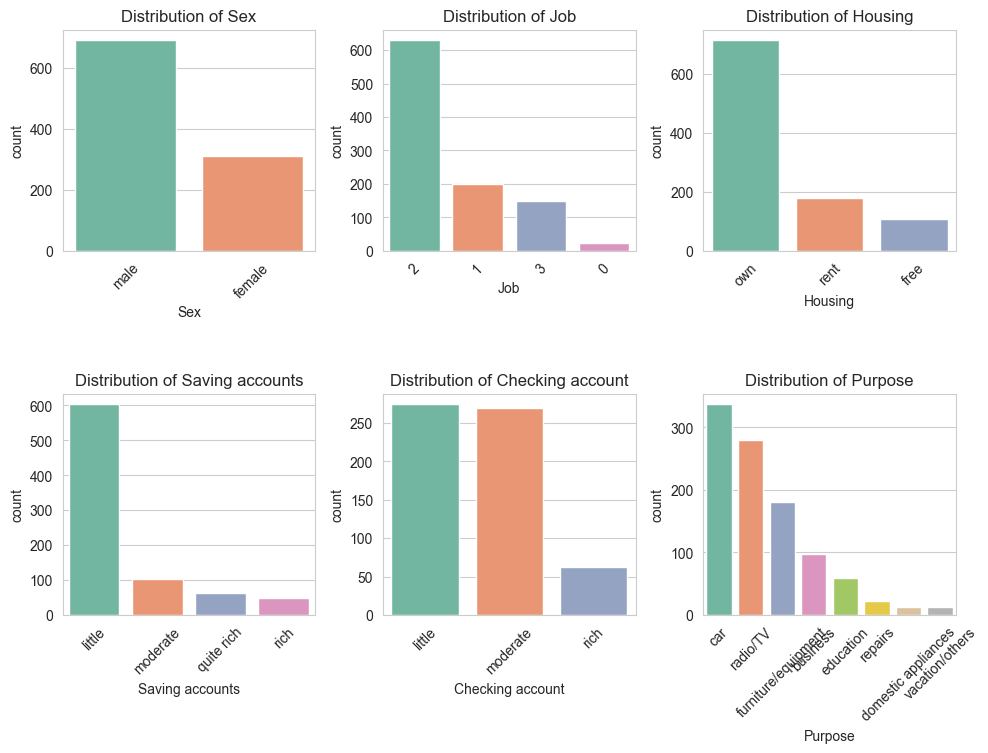

In [141]:
plt.figure(figsize=(10,10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)  
    sns.countplot(
        data=df, 
        x=col, 
        palette="Set2", 
        order=df[col].value_counts().index
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()          


In [142]:
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()


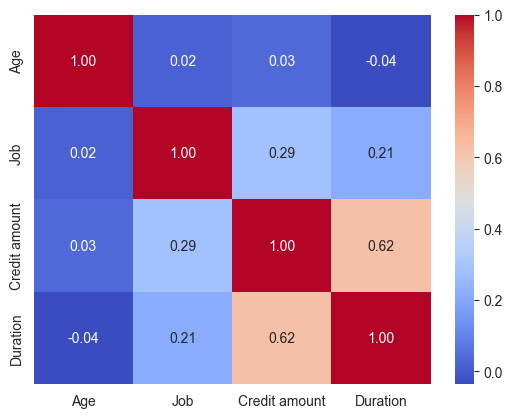

In [143]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [144]:
df.groupby("Job")["Credit amount"].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [145]:

df.groupby("Sex")["Credit amount"].mean()


Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [146]:
pd.pivot_table(df, values="Credit amount", index = "Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


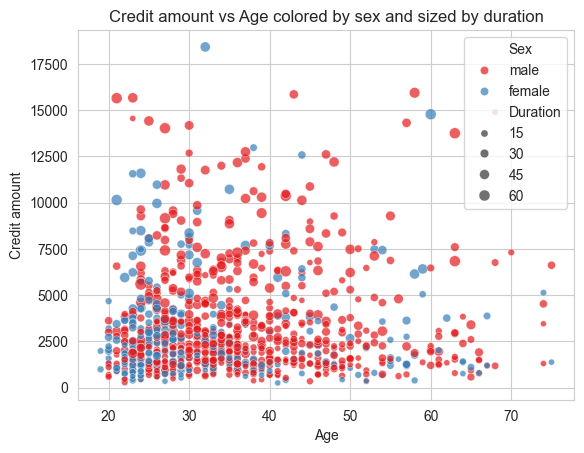

In [147]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", size="Duration", alpha=0.7, palette="Set1"); plt.title("Credit amount vs Age colored by sex and sized by duration"); plt.show()


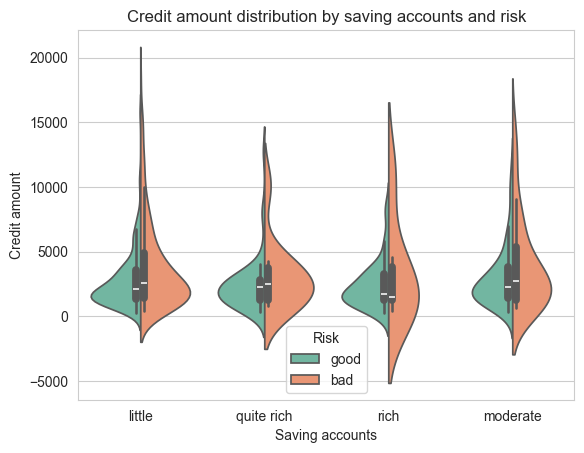

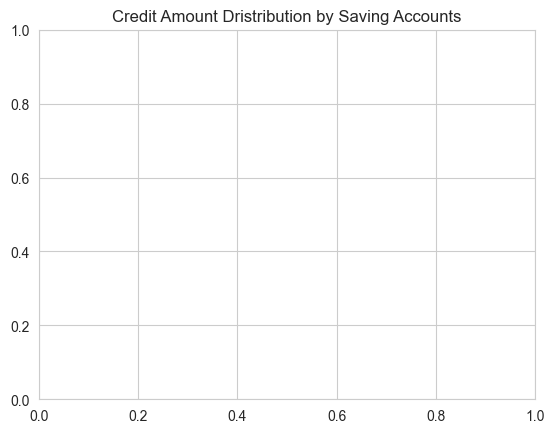

In [148]:
sns.violinplot(data = df, x="Saving accounts", y="Credit amount", hue="Risk", split=True, palette="Set2"); plt.title("Credit amount distribution by saving accounts and risk"); plt.show()
plt.title("Credit Amount Dristribution by Saving Accounts")
plt.show()

In [149]:
df["Risk"].value_counts(normalize=True) * 100


Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

C:\Users\Prathmesh Bunde\AppData\Local\Temp\ipykernel_16776\1428101875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="pastel")
C:\Users\Prathmesh Bunde\AppData\Local\Temp\ipykernel_16776\1428101875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="pastel")
C:\Users\Prathmesh Bunde\AppData\Local\Temp\ipykernel_16776\1428101875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="pastel")


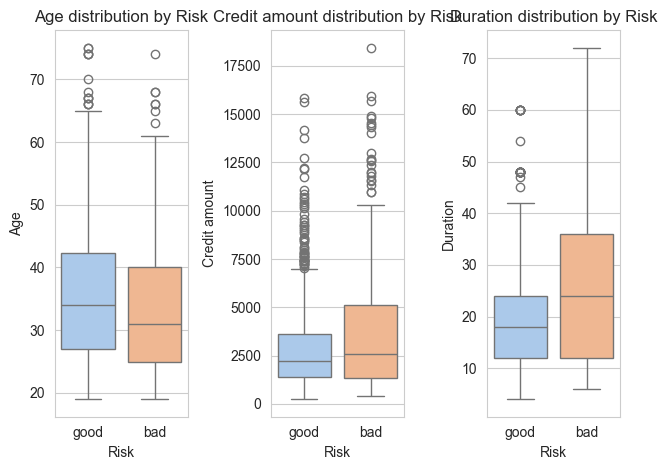

In [150]:
for i, col in enumerate(["Age", "Credit amount", "Duration"]): 
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x="Risk", y=col, palette="pastel")
    plt.title(f"{col} distribution by Risk")

plt.tight_layout()
plt.show()

In [151]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [152]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

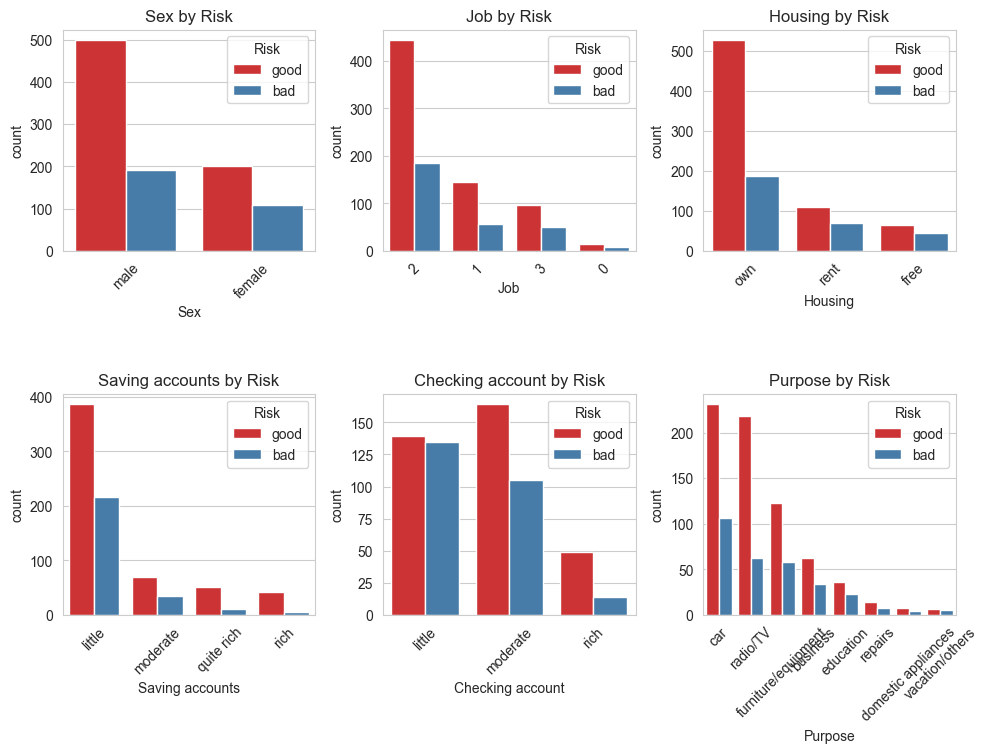

In [153]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1) 
    sns.countplot(
        data=df,
        x=col,
        hue="Risk",
        palette="Set1",
        order=df[col].value_counts().index
    )
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [154]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='str')

In [155]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [156]:
target = "Risk"

In [157]:
df_model = df[features + [target]].copy()

In [158]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,NaN,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,NaN,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [159]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [160]:
cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")

C:\Users\Prathmesh Bunde\AppData\Local\Temp\ipykernel_16776\714141096.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")


In [161]:
le_dict = {}

In [162]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='str')

In [163]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_le.pkl")

In [164]:
le_target = LabelEncoder()


In [165]:
target

'Risk'

In [166]:
df_model[target] = le_target.fit_transform(df_model[target])


In [167]:
df_model[target].value_counts()

Risk
1    700
0    300
Name: count, dtype: int64

In [168]:
joblib.dump(le_target, f"{target}_le.pkl")

['Risk_le.pkl']

In [169]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,4,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,3,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0


In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X = df_model.drop(target, axis=1)

In [172]:
y = df_model[target]

In [173]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,4,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,3,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,3,804,12
998,23,1,2,0,0,0,1845,45


In [174]:
from sklearn.model_selection import train_test_split


In [175]:
X = df_model.drop(target, axis = 1)

In [176]:
y= df_model[target]

In [177]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,4,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,3,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,3,804,12
998,23,1,2,0,0,0,1845,45


In [178]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state= 1)

In [180]:
X_train.shape

(800, 8)

In [181]:
X_test.shape

(200, 8)

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [183]:
def train_model(model, param_grid,X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv = 5, scoring = "accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [184]:
dt = DecisionTreeClassifier(random_state=1, class_weight="balanced")

dt_param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [185]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [186]:
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 0.705


In [187]:
print("Best parameters", params_dt)

Best parameters {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [188]:
rf = RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs= -1 )

In [189]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [190]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [191]:
print("Random Forest Accurancy", acc_rf)

Random Forest Accurancy 0.78


In [192]:
print ("Best param", params_rf)

Best param {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [193]:
et = ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1)

In [194]:
et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [195]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [196]:
print("Extra trees accuracy", acc_et)

Extra trees accuracy 0.755


In [197]:
print("Best param:", params_et)

Best param: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [198]:
_gb = XGBClassifier(random_state=1, scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum(), use_label_encoder=False, eval_metric="logloss")

In [199]:
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7,],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree": [0.7, 1]
}

In [200]:
best_xgb, acc_xgb, params_xgb = train_model(_gb, xgb_param_grid, X_train, y_train, X_test, y_test)

c:\Code\CREDIT RISK MODEL\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:11:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [201]:
print ("XGB accuracy", acc_xgb)

XGB accuracy 0.75


In [202]:
print("Best param:", params_xgb)

Best param: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}


In [203]:
best_et.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0])

In [204]:
joblib.dump(best_et, "extra_trees_credit_model.pkl")

['extra_trees_credit_model.pkl']